In [18]:
options(repr.plot.width=10, repr.plot.height=7)

library('lmtest')
library("sandwich")

## Решение задачи 2.2

Загрузим датасет с данными по стоимости квартир в Москве (<a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">источник</a>).

In [19]:
flats <- read.table('flats_moscow.txt', header = TRUE)[-1]
head(flats)

price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
81,58,40,6,12.5,7,1,1,1,3
75,44,28,6,13.5,7,1,0,1,6
128,70,42,6,14.5,3,1,1,1,3
95,61,37,6,13.5,7,1,0,1,1
330,104,60,11,10.5,7,0,1,1,3
137,76,50,9,11.0,7,1,1,1,8


Последний признак является категориальным (это код района по линиям метро), поэтому для него создаем dummy-переменные

In [20]:
flats$code <- factor(flats$code)

По графику зависимости цены квартиры от ее площади есть подозрения на гетероскедастичность. Позже посмотрим на график остатков.

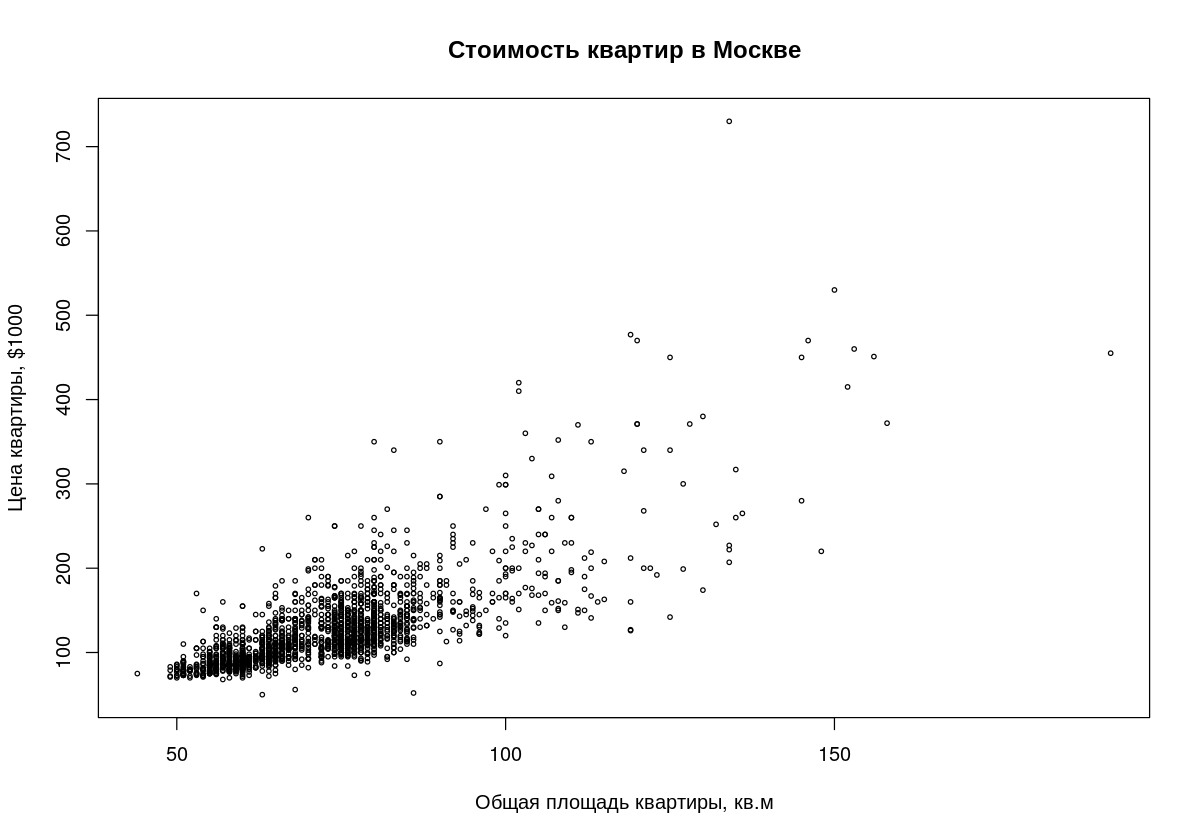

In [21]:
plot(
    flats$price ~ flats$totsp, 
    cex = 0.5,
    xlab = 'Общая площадь квартиры, кв.м',
    ylab = 'Цена квартиры, $1000',
    main = 'Стоимость квартир в Москве'
)

Обучаем регрессию для предсказания цены квартиры по ее площади

In [22]:
model <- lm(price ~ . - metrdist - walk, data = flats)
summary(model)


Call:
lm(formula = price ~ . - metrdist - walk, data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-105.42  -12.75   -0.46    9.82  412.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.7122     5.3275  -5.389 7.89e-08 ***
totsp         1.6667     0.1182  14.100  < 2e-16 ***
livesp        1.1562     0.1793   6.448 1.41e-10 ***
kitsp         1.8214     0.3968   4.590 4.71e-06 ***
dist         -3.2791     0.2233 -14.687  < 2e-16 ***
brick         5.0095     1.6123   3.107  0.00192 ** 
floor         6.7106     1.6048   4.182 3.02e-05 ***
code2         0.1510     2.7381   0.055  0.95602    
code3         4.4855     2.3926   1.875  0.06098 .  
code4         4.4042     2.6977   1.633  0.10272    
code5       -19.9630     2.4132  -8.272 2.35e-16 ***
code6       -16.0780     2.5441  -6.320 3.21e-10 ***
code7       -15.4034     2.6429  -5.828 6.50e-09 ***
code8        -4.4689     2.8452  -1.571  0.11641    
---
Signif. codes:  0 ‘***’ 0.001

По графику зависимости остатков от одного из признаков видна гетероскедастичность.

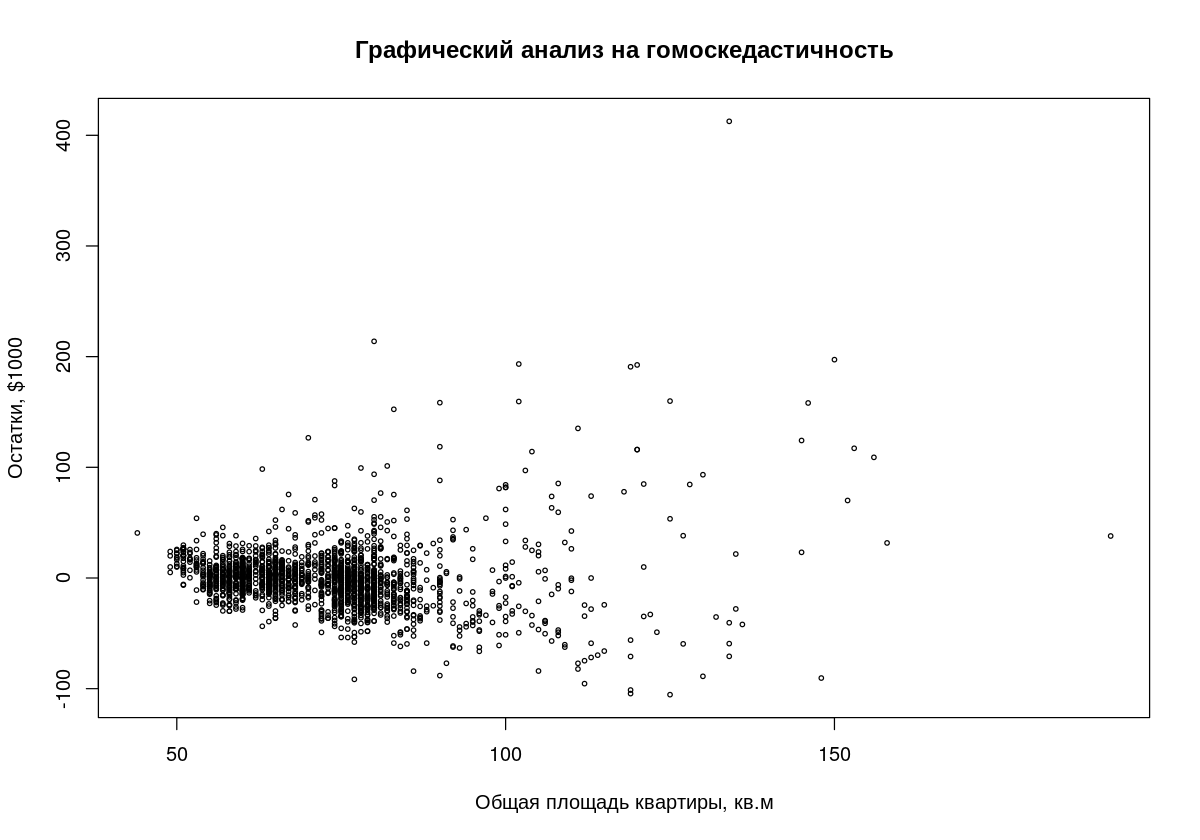

In [23]:
plot(
    model$residuals ~ flats$totsp, 
    cex = 0.5,
    xlab = 'Общая площадь квартиры, кв.м',
    ylab = 'Остатки, $1000',
    main = 'Графический анализ на гомоскедастичность'
)

 Поскольку есть все основания полагать, что ошибки на самом деле гетероскедастичны, будем сразу использовать устойчивые оценки дисперсии. Они не требуют нормальности и гомоскедастичности, а получаемые статистические свойства являются асимптотическими.

Ковариационную матрицу вектора $\widehat{\theta}$ сразу считаем в условиях гетероскедастичности с помощью устойчивых оценок Уайта.

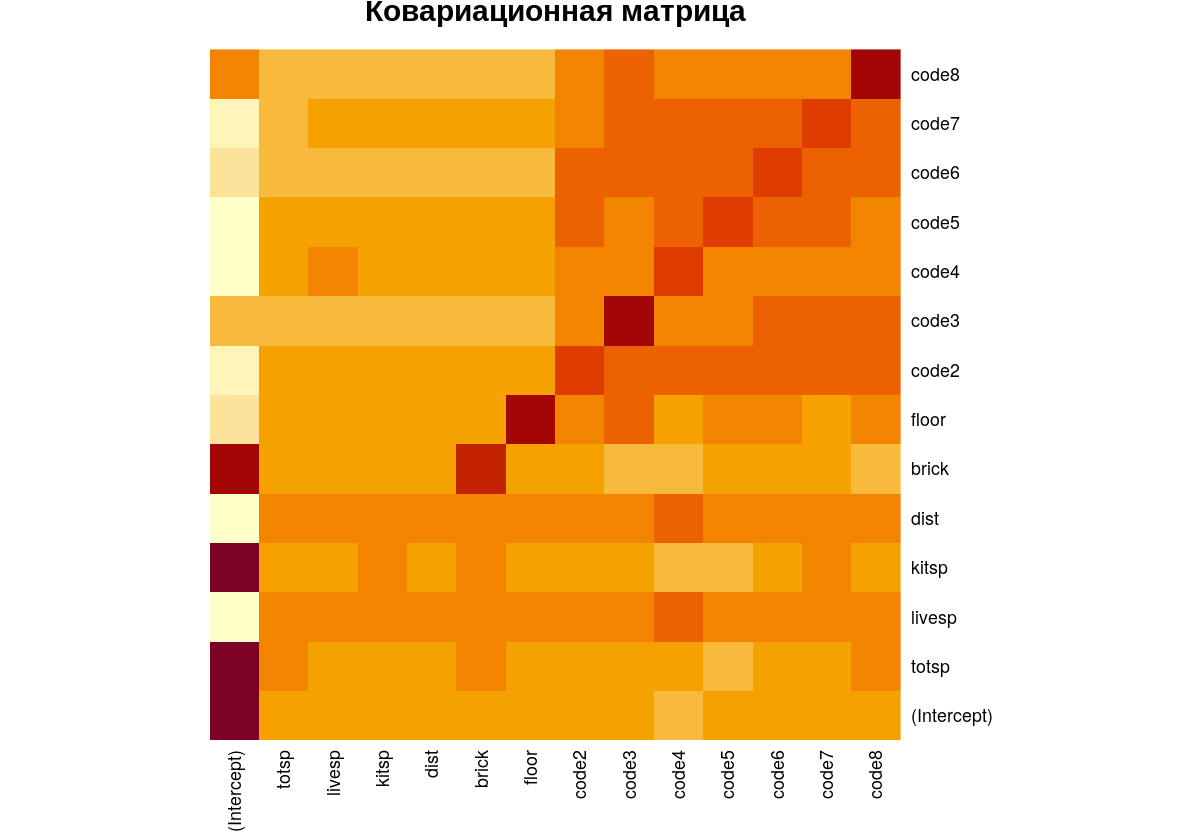

In [24]:
cov <- vcovHC(model)
heatmap(cov, Rowv = NA, Colv = NA, main = 'Ковариационная матрица')

Проверка гипотез о незначимости коэффициентов, используется устойчивая оценка дисперсии

In [14]:
coef.table <- coeftest(model, vcov = vcovHC(model))
coef.table


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) -28.71220   13.97972  -2.0538  0.040119 *  
totsp         1.66671    0.22968   7.2566 5.627e-13 ***
livesp        1.15623    0.50366   2.2957  0.021797 *  
kitsp         1.82137    0.76128   2.3925  0.016824 *  
dist         -3.27912    0.24416 -13.4302 < 2.2e-16 ***
brick         5.00951    1.89869   2.6384  0.008393 ** 
floor         6.71056    1.36338   4.9220 9.258e-07 ***
code2         0.15103    2.18875   0.0690  0.944994    
code3         4.48550    2.79424   1.6053  0.108590    
code4         4.40421    3.55141   1.2401  0.215072    
code5       -19.96295    2.30463  -8.6621 < 2.2e-16 ***
code6       -16.07801    2.17817  -7.3814 2.274e-13 ***
code7       -15.40335    2.50960  -6.1378 1.004e-09 ***
code8        -4.46885    2.86747  -1.5585  0.119279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Асимптотический доверительный интервал для коэффициентов, используется устойчивая оценка дисперсии

In [15]:
coefci(model, vcov = vcovHC(model))

,2.5 %,97.5 %
(Intercept),-56.1283233,-1.296086
totsp,1.2162776,2.117152
livesp,0.1684836,2.143982
kitsp,0.3284018,3.314344
dist,-3.7579516,-2.800290
brick,1.2859239,8.733103
floor,4.0367986,9.384327
code2,-4.1414093,4.443472
code3,-0.9943756,9.965378
code4,-2.5605987,11.369012


## Конец решения задачи.

### По приколу можно еще проверить остатки на нормальность и гомоскедастичность.

Критерии проверки на гомоскедастичность

In [16]:
bptest(model)
gqtest(price ~ ., data = flats, fraction = 0.2, order.by = ~ totsp)


	studentized Breusch-Pagan test

data:  model
BP = 290.2, df = 13, p-value < 2.2e-16



	Goldfeld-Quandt test

data:  price ~ .
GQ = 11.162, df1 = 800, df2 = 800, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2


Проверка на нормальность

In [17]:
shapiro.test(model$residuals)


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.81043, p-value < 2.2e-16


---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/